# Loading data into Sagemaker from S3

In [18]:
import pandas as pd
bucket = "sagemaker-course-di"
prefix = "datasets"
filename = "boston_house_prices.csv"

In [19]:
data_s3_location = "s3://{}/{}/{}".format(bucket, prefix, filename)  # S3 URL
s3_tabular_data = pd.read_csv(data_s3_location, header=None, sep="  ", names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"])
s3_tabular_data.head()


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.5750,65.20,4.0900,1.0,296.0,15.30 396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0.0,0.469,6.4210,78.90,4.9671,2.0,242.0,17.80 396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0.0,0.469,7.1850,61.10,4.9671,2.0,242.0,17.80 392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0.0,0.458,6.9980,45.80,6.0622,3.0,222.0,18.70 394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0.0,0.458,7.1470,54.20,6.0622,3.0,222.0,18.70 396.90,5.33,36.2,NaN


Oh no! the Price column got wrong because of that PTRATIO split being done by a single whitespace! Let's split it to fix it!

In [20]:
s3_tabular_data['PRICE'] = s3_tabular_data['LSTAT']
s3_tabular_data['LSTAT'] = s3_tabular_data['B']
s3_tabular_data[['PTRATIO', 'B']] = s3_tabular_data['PTRATIO'].str.split(' ', 1, expand=True)

In [21]:
s3_tabular_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.5750,65.20,4.0900,1.0,296.0,15.30,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.4210,78.90,4.9671,2.0,242.0,17.80,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.1850,61.10,4.9671,2.0,242.0,17.80,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.9980,45.80,6.0622,3.0,222.0,18.70,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.1470,54.20,6.0622,3.0,222.0,18.70,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.5930,69.10,2.4786,1.0,273.0,21.00,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.1200,76.70,2.2875,1.0,273.0,21.00,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.9760,91.00,2.1675,1.0,273.0,21.00,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.7940,89.30,2.3889,1.0,273.0,21.00,393.45,6.48,22.0


## Data Preprocessing

Amazing! Now it is important to get an idea of the valus of our variables, let's describe them.

In [23]:
display(s3_tabular_data.describe())

,ZN,INDUS,CHAS,NOX,DIS,RAD,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,464.000000
mean,11.168617,11.134170,0.069982,0.567353,5.071604,59.839921,13.807154,23.224267
std,22.990024,6.864343,0.254429,0.301426,5.032745,164.160993,12.039853,8.801487
min,0.000000,0.000000,0.000000,0.385000,1.129600,1.000000,0.320000,6.300000
25%,0.000000,5.190000,0.000000,0.449000,2.358450,4.000000,6.922500,18.122500
50%,0.000000,9.690000,0.000000,0.538000,3.671500,5.000000,11.310000,21.700000
75%,12.500000,18.100000,0.000000,0.624000,5.499950,24.000000,16.492500,25.225000
max,95.000000,27.740000,1.000000,6.816000,24.000000,666.000000,97.950000,50.000000


Let's try to remove those rows where our target variable is not present. Also the means are quite different, this affects the training performance, let's standardize them.

In [24]:
s3_tabular_data.dropna(inplace=True)

In [26]:
display(s3_tabular_data.describe())

,ZN,INDUS,CHAS,NOX,DIS,RAD,LSTAT,PRICE
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12.017241,10.359816,0.073563,0.537700,4.080512,11.165517,11.555885,23.572874
std,23.425174,6.746537,0.261359,0.106681,2.386062,45.233854,6.252466,8.861091
min,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,1.730000,6.300000
25%,0.000000,4.940000,0.000000,0.447000,2.361700,4.000000,6.635000,18.600000
50%,0.000000,8.140000,0.000000,0.515000,3.554900,5.000000,10.290000,21.900000
75%,20.000000,18.100000,0.000000,0.605000,5.400900,7.000000,15.065000,26.550000
max,95.000000,27.740000,1.000000,0.871000,24.000000,666.000000,31.990000,50.000000


Amazing, next step we need to check the types of our variables, to take them as input to our models! Let's verify that!

In [28]:
s3_tabular_data.dtypes

CRIM        object
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM          object
AGE         object
DIS        float64
RAD        float64
TAX         object
PTRATIO     object
B           object
LSTAT      float64
PRICE      float64
dtype: object

Oh no! Some columns were not converted to floats, let's fix that!

In [30]:
cols = s3_tabular_data.columns[s3_tabular_data.dtypes.eq('object')]
s3_tabular_data[cols] = s3_tabular_data[cols].apply(pd.to_numeric, errors='coerce')

In [31]:
s3_tabular_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

Great, not we can truly standardise the columns.

In [37]:
from sklearn import preprocessing

x = s3_tabular_data.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=s3_tabular_data.columns)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.330000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.350000e+02,4.330000e+02,4.350000e+02,4.350000e+02,4.350000e+02
mean,-1.139574e-16,2.470565e-16,-1.314402e-17,-5.717011e-17,-2.194924e-16,-8.916399e-16,2.855953e-16,-6.788950e-17,2.678573e-16,2.210237e-16,-1.128171e-17,-2.092834e-16,-9.290142e-17,4.103997e-16
std,1.001151e+00,1.001151e+00,1.001151e+00,1.001151e+00,1.001151e+00,1.001157e+00,1.001151e+00,1.001151e+00,1.001151e+00,1.001151e+00,1.001157e+00,1.001151e+00,1.001151e+00,1.001151e+00
min,-3.540650e-01,-5.135961e-01,-1.469082e+00,-2.817880e-01,-1.433016e+00,-4.088369e+00,-2.261033e+00,-1.238153e+00,-2.249913e-01,-2.282262e+00,-2.705473e+00,-8.194764e+00,-1.573331e+00,-1.951539e+00
25%,-3.445486e-01,-5.135961e-01,-8.042728e-01,-2.817880e-01,-8.511778e-01,-6.260956e-01,-8.574647e-01,-7.211846e-01,-1.585929e-01,-6.586222e-01,-6.302385e-01,4.913291e-02,-7.879373e-01,-5.618495e-01
50%,-3.272186e-01,-5.135961e-01,-3.294093e-01,-2.817880e-01,-2.130323e-01,-1.725803e-01,2.004654e-01,-2.205381e-01,-1.364601e-01,-4.618559e-01,1.243921e-01,3.259981e-01,-2.026948e-01,-1.890060e-01
75%,-1.730383e-01,3.411693e-01,1.148603e+00,-2.817880e-01,6.315720e-01,4.335744e-01,9.408380e-01,5.540123e-01,-9.219452e-02,3.315567e-01,8.790227e-01,4.162470e-01,5.618831e-01,3.363642e-01
max,1.313656e+01,3.546540e+00,2.579130e+00,3.548767e+00,3.127847e+00,3.571489e+00,1.231635e+00,8.357880e+00,1.449331e+01,2.102454e+00,1.350667e+00,4.214915e-01,3.271932e+00,2.985812e+00


The preprocessing module has many tricks in sklearn. Check we just import it, we don't need to worry about installs.

## Data Analysis

Now we can check if some feature needs to be removed, we can check both the clustermap and correlation.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

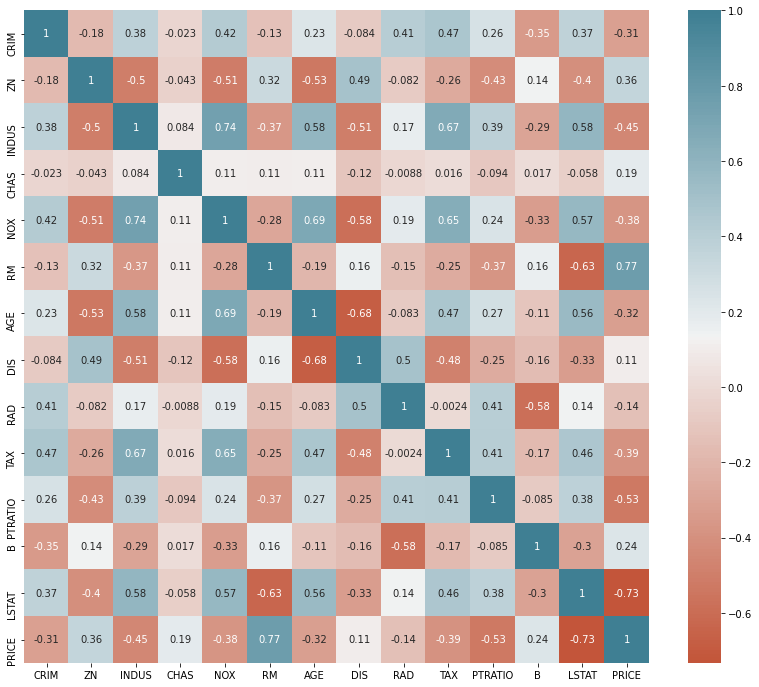

In [40]:
plt.figure(figsize=(14, 12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()


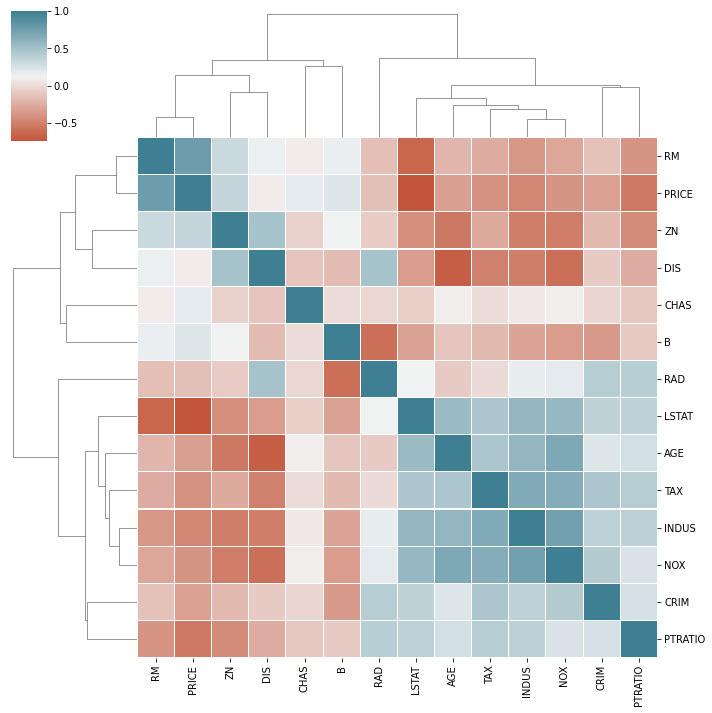

In [41]:
cluster_map = sns.clustermap(cor, cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.1)
plt.setp(cluster_map.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cluster_map

Probably the most negatively correlated features are PRICE and LSTAT, however as PRICE is what we try to predict, this means that LSTAT will be useful in our model. Let's keep the features for now, but these analysis are very useful

## Split the dataset and store for future uses

In [47]:
df.dropna(inplace=True)
X = df.loc[:, df.columns != "PRICE"]
Y = df["PRICE"]


In [48]:
# We partition the dataset into 2/3 training and 1/3 test set.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.33)

# We further split the training set into a validation set i.e., 2/3 training set, and 1/3 validation set
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(
    X_train, Y_train, test_size=0.33
)

In [49]:
%store X_train
%store X_test
%store X_val
%store Y_train
%store Y_test
%store Y_val

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'X_val' (DataFrame)
Stored 'Y_train' (Series)
Stored 'Y_test' (Series)
Stored 'Y_val' (Series)
